In [23]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from optimizer import SGD

plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')

In [36]:
def function_2d(x, y):
    """2차원 함수: f(x,y) = 1/100 * x^2 + y^2"""
    return 1/10 * x**2 + y**2

def gradient_2d(x, y):
    """함수의 기울기"""
    return np.array([1/5 * x, 2*y])

def stochastic_gradient_2d(x, y, batch_size=10):
    """확률적 경사하강법을 위한 그래디언트 계산
    주변의 여러 점들에서 그래디언트를 계산하고 평균을 냄"""
    # 현재 위치 주변에서 무작위로 batch_size만큼의 점들을 샘플링
    points = np.random.normal(loc=[x, y], scale=0.5, size=(batch_size, 2))
    grads = np.array([gradient_2d(px, py) for px, py in points])
    return np.mean(grads, axis=0)  # 배치의 평균 그래디언트 반환

# 시각화를 위한 데이터 생성
x = np.arange(-10, 10, 0.1)
y = np.arange(-10, 10, 0.1)
X, Y = np.meshgrid(x, y)
Z = function_2d(X, Y)

# SGD 최적화 수행
optimizer = SGD(lr=0.4)
init_pos = np.array([-9.0, 2.0])
pos = init_pos.copy()
pos_history = [pos.copy()]

# 파라미터와 기울기를 저장할 딕셔너리
params = {'pos': pos}

for i in range(30):
    # 미니배치 그래디언트 계산
    grad = stochastic_gradient_2d(params['pos'][0], params['pos'][1], batch_size=10)
    grads = {'pos': grad}
    
    # SGD 업데이트
    optimizer.update(params, grads)
    pos = params['pos']  # 업데이트된 위치
    pos_history.append(pos.copy())

pos_history = np.array(pos_history)

Initial position: (-9.00, 2.00)
Final position: (-0.74, 0.04)
Minimum value: 0.055739


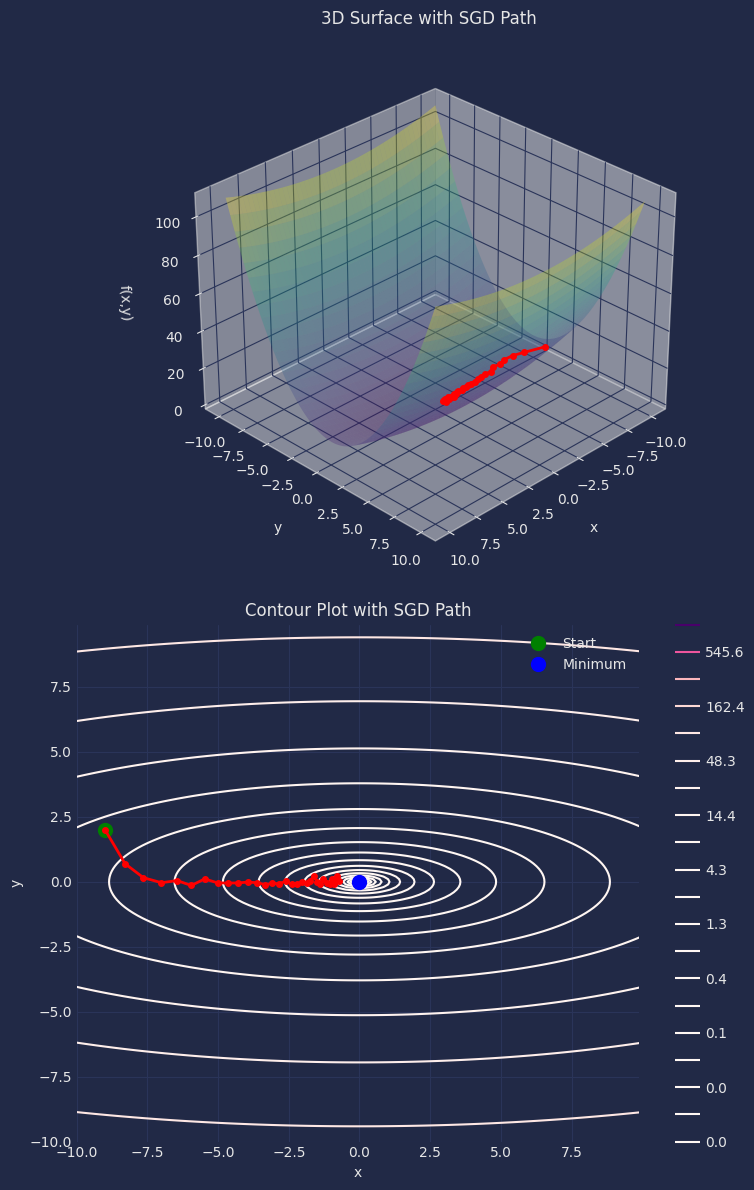

In [37]:
# 그래프 설정
fig = plt.figure(figsize=(8, 12))  # 세로로 긴 figure 크기

# 3D 서브플롯
ax1 = fig.add_subplot(211, projection='3d')  # 2행 1열의 첫 번째
surf = ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.3)
ax1.view_init(elev=30, azim=45)
ax1.set_xlabel('x', labelpad=10)
ax1.set_ylabel('y', labelpad=10)
ax1.set_zlabel('f(x,y)', labelpad=10)
ax1.set_title('3D Surface with SGD Path', pad=20)

# Contour 서브플롯
ax2 = fig.add_subplot(212)  # 2행 1열의 두 번째
contour = ax2.contour(X, Y, Z, levels=np.logspace(-2, 3, 20))
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Contour Plot with SGD Path')
plt.colorbar(contour, ax=ax2)
ax2.grid(True)

# 시작점과 최소점 표시
ax2.plot(init_pos[0], init_pos[1], 'go', markersize=10, label='Start')
ax2.plot(0, 0, 'bo', markersize=10, label='Minimum')
ax2.legend()

# 애니메이션을 위한 선 객체 초기화
line1, = ax1.plot([], [], [], 'r.-', linewidth=2, markersize=8)
line2, = ax2.plot([], [], 'r.-', linewidth=2, markersize=8)

# 애니메이션 함수
def update(frame):
    # 현재 프레임까지의 경로
    path = pos_history[:frame+1]
    z_path = [function_2d(p[0], p[1]) for p in path]
    
    # 3D plot 업데이트
    line1.set_data(path[:, 0], path[:, 1])
    line1.set_3d_properties(z_path)
    
    # Contour plot 업데이트
    line2.set_data(path[:, 0], path[:, 1])
    
    return line1, line2

# 애니메이션 생성
anim = FuncAnimation(fig, update, frames=len(pos_history), 
                    interval=100, blit=True, repeat=True)

plt.tight_layout(h_pad=2.0)  # 서브플롯 간 간격 조정

# HTML로 표시 (Jupyter Notebook에서 작동)
HTML(anim.to_jshtml())

# 최종 결과 출력
print(f"Initial position: ({init_pos[0]:.2f}, {init_pos[1]:.2f})")
print(f"Final position: ({pos[0]:.2f}, {pos[1]:.2f})")
print(f"Minimum value: {function_2d(pos[0], pos[1]):.6f}")

# GIF로 저장
anim.save('stochastic_gradient_descent.gif', writer='pillow', fps=10)

Initial position: (-9.00, 2.00)
Final position: (-0.74, 0.04)
Minimum value: 0.055739


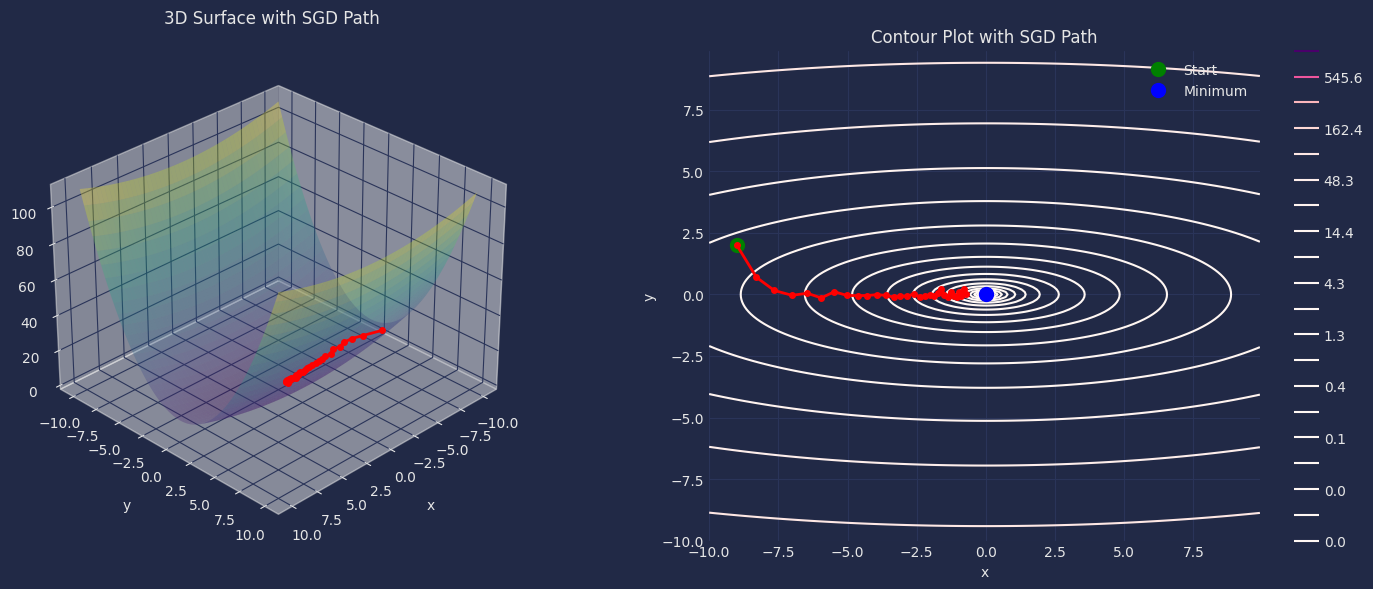

In [38]:
# 그래프 설정
fig = plt.figure(figsize=(15, 6))

# 3D 서브플롯
ax1 = fig.add_subplot(121, projection='3d')
surf = ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.3)
ax1.view_init(elev=30, azim=45)
ax1.set_xlabel('x', labelpad=10)
ax1.set_ylabel('y', labelpad=10)
ax1.set_zlabel('f(x,y)', labelpad=10)
ax1.set_title('3D Surface with SGD Path', pad=20)

# Contour 서브플롯
ax2 = fig.add_subplot(122)
contour = ax2.contour(X, Y, Z, levels=np.logspace(-2, 3, 20))
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Contour Plot with SGD Path')
plt.colorbar(contour, ax=ax2)
ax2.grid(True)

# 시작점과 최소점 표시
ax2.plot(init_pos[0], init_pos[1], 'go', markersize=10, label='Start')
ax2.plot(0, 0, 'bo', markersize=10, label='Minimum')
ax2.legend()

# 애니메이션을 위한 선 객체 초기화
line1, = ax1.plot([], [], [], 'r.-', linewidth=2, markersize=8)
line2, = ax2.plot([], [], 'r.-', linewidth=2, markersize=8)

# 애니메이션 함수
def update(frame):
    path = pos_history[:frame+1]
    z_path = [function_2d(p[0], p[1]) for p in path]
    
    line1.set_data(path[:, 0], path[:, 1])
    line1.set_3d_properties(z_path)
    
    line2.set_data(path[:, 0], path[:, 1])
    
    return line1, line2

# 애니메이션 생성
anim = FuncAnimation(fig, update, frames=len(pos_history), 
                    interval=100, blit=True, repeat=True)

plt.tight_layout(w_pad=4.0)

# HTML로 표시
HTML(anim.to_jshtml())

# 최종 결과 출력
print(f"Initial position: ({init_pos[0]:.2f}, {init_pos[1]:.2f})")
print(f"Final position: ({pos[0]:.2f}, {pos[1]:.2f})")
print(f"Minimum value: {function_2d(pos[0], pos[1]):.6f}")

# GIF로 저장
anim.save('stochastic_gradient_descent2.gif', writer='pillow', fps=10)